In [8]:
import pandas as pd
df = pd.read_csv('EVSE-B-PowerCombined.csv')

In [2]:
df.head()

,time,shunt_voltage,bus_voltage_V,current_mA,power_mW,State,Attack,Attack-Group,Label,interface
0,12/25/2023 22:35,978,5.165,1027,5300,idle,syn-flood,DoS,attack,ocpp
1,12/25/2023 22:35,872,5.161,1009,4980,idle,syn-flood,DoS,attack,ocpp
2,12/25/2023 22:35,1017,5.165,1029,5300,idle,syn-flood,DoS,attack,ocpp
3,12/25/2023 22:35,930,5.161,1005,5180,idle,syn-flood,DoS,attack,ocpp
4,12/25/2023 22:35,958,5.165,1034,5180,idle,syn-flood,DoS,attack,ocpp


In [7]:
print("Descriptive Statistics:")
print(df.describe())

# Data types and missing values
print("\nData Types and Missing Values:")
print(df.info())
print("\nMissing Values Count:")
print(df.isnull().sum())

Descriptive Statistics:
       shunt_voltage  bus_voltage_V     current_mA       power_mW
count  115298.000000  115298.000000  115298.000000  115298.000000
mean      619.787932       5.188204     619.760672    3212.783916
std       197.188339       0.014482     197.312950    1011.567259
min       417.000000       5.149000     417.000000    2160.000000
25%       467.000000       5.181000     467.000000    2420.000000
50%       510.000000       5.197000     510.000000    2660.000000
75%       746.000000       5.197000     747.000000    3860.000000
max      1214.000000       5.209000    1220.000000    6300.000000

Data Types and Missing Values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115298 entries, 0 to 115297
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   time           115298 non-null  object 
 1   shunt_voltage  115298 non-null  int64  
 2   bus_voltage_V  115298 non-null  float64
 3   current_m

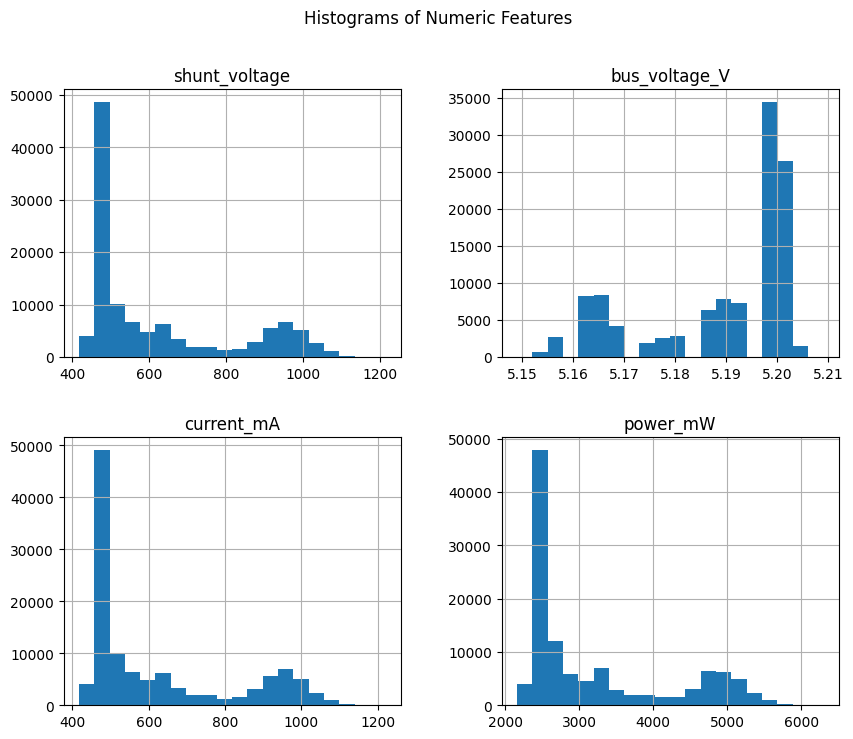

In [5]:
import matplotlib.pyplot as plt
# Distribution of numeric columns
numeric_columns = ['shunt_voltage', 'bus_voltage_V', 'current_mA', 'power_mW']
df[numeric_columns].hist(bins=20, figsize=(10, 8))
plt.suptitle("Histograms of Numeric Features")
plt.show()

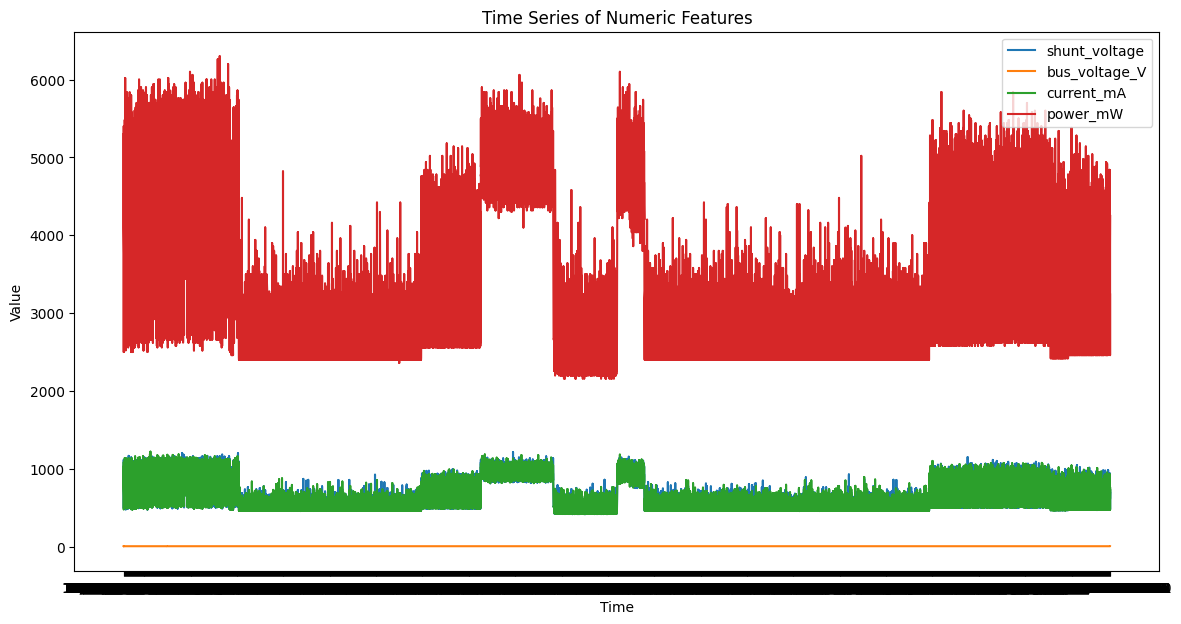

In [10]:
# Time series visualization of numeric features
plt.figure(figsize=(14, 7))
for col in numeric_columns:
    plt.plot(df['time'], df[col], label=col)
plt.title("Time Series of Numeric Features")
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.show()

In [11]:
df_=df.copy()

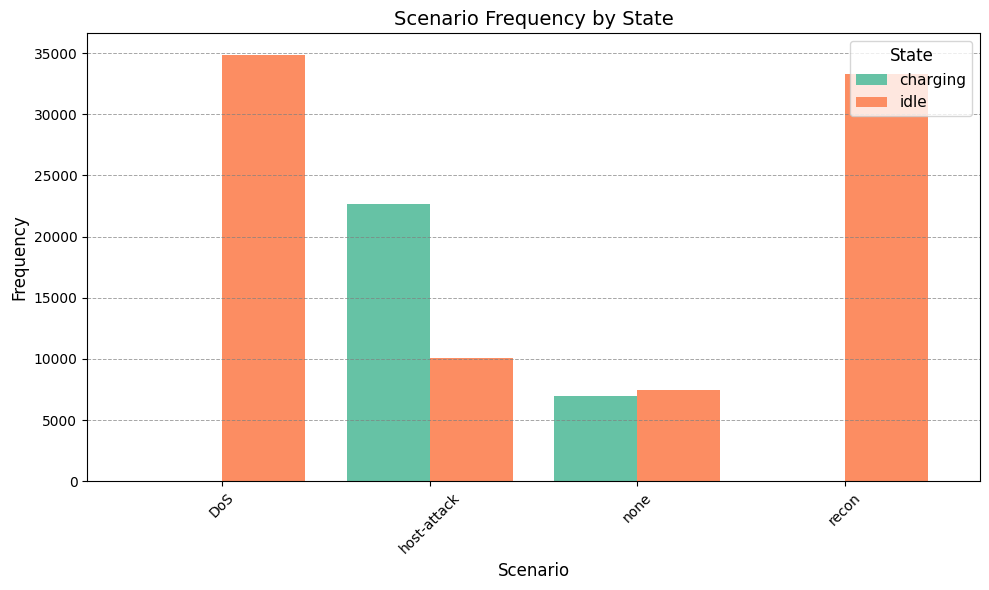

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a crosstab to count the occurrences of each Scenario based on the State
scenario_state_count = pd.crosstab(df_['Attack-Group'], df_['State'])
# Define a color palette with a professional cybersecurity theme
colors = sns.color_palette("Set2", n_colors=len(scenario_state_count.columns))

# Plot the data as a grouped bar chart
scenario_state_count.plot(kind='bar', figsize=(10, 6), width=0.8, color = colors)

# Add labels and title
plt.title('Scenario Frequency by State', fontsize=14)
plt.xlabel('Scenario', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title='State', fontsize=11, title_fontsize=12, loc='upper right')
plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7, color='gray')
plt.tight_layout()

# Show the plot
plt.show()
